In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import configs


In [2]:
### Results from control experiment
f = open('trainlogs/log_rnd_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'rb')
log  = pickle.load(f)
f.close()
log = np.array(log)
print(log.shape)

### Results from trained model
f = open('trainlogs/log_ppo_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'rb')
log2  = pickle.load(f)
f.close()
log2 = np.array(log2)
print(log2.shape)

(500, 3)
(500, 3)


In [3]:
#print(log[:,1])
lastCasesPPO = int(-1*configs.max_updates*0.1) # Get the 10% of final updates 
print(lastCasesPPO)
data = dict({"rnd":-1*log[:,1],"cloud":-1*log[:,2],"ppo":-1*log2[:,1],"ppo-last":-1*log2[lastCasesPPO:,1]})


-50


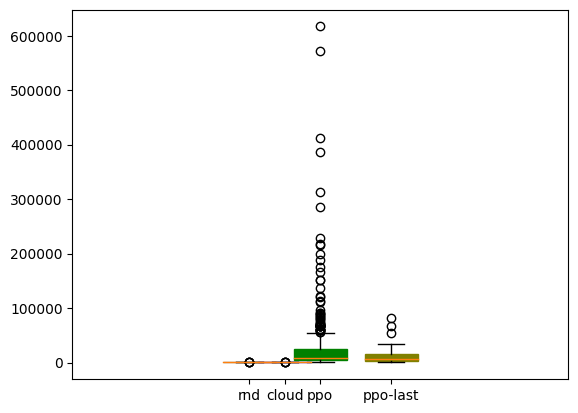

In [4]:
colors = ["#293302AA","blue","green","olive"]
fig, ax = plt.subplots()
boxs = ax.boxplot(
    data.values(),
    positions=[0,.1,.2,.4],
    labels=["rnd","cloud","ppo","ppo-last"],
    patch_artist=True
)
for i,box in enumerate(boxs["boxes"]):
    box.set(color=colors[i])

plt.show()